# Workshop 5

Starter code for workshop 5. You should have seen most of it before, but make sure you understand what it is doing!

Modified by Hu Wang

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To plot even prettier figures
import seaborn as sn

# General data handling (pure numerics are better in numpy)
import pandas as pd

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
xarray = data.data
yarray = data.target
print(xarray.shape)
print(yarray.shape)
fullarray = np.concatenate((xarray,np.reshape(yarray,(-1,1))),axis=1)
print(fullarray.shape)

(569, 30)
(569,)
(569, 31)


In [ ]:
fullarray[:,-1] = 1 - fullarray[:,-1]   # now invert the labels (so that malignant=1)
df = pd.DataFrame(fullarray,columns = list(data.feature_names) + ['target'])

The code below is incomplete and will require some editing to work ...

# Splitting into separate datasets

In [ ]:
from sklearn.model_selection import train_test_split

bigtrain_set, test_set = train_test_split(fullarray, test_size=0.2, random_state=42, stratify=fullarray[:,-1])
train_set, val_set = train_test_split(bigtrain_set, test_size=0.2, random_state=42, stratify=bigtrain_set[:,-1])

### **Note:** here we use the *stratify* option, which splits the sets whilst trying to keep the same proportions of the classification labels in each (hence it needs to know the labels). This is an important option to use in most classification tasks (and it can also be used for regression if you divide the data into discrete sets just for stratifying, such as small, medium, large values).

In [ ]:
X_train = train_set[:,:-1]
y_train = train_set[:,-1]
X_test = test_set[:,:-1]
y_test = test_set[:,-1]
X_val = val_set[:,:-1]
y_val = val_set[:,-1]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(364, 30), (364,), (114, 30), (114,), (91, 30), (91,)]


In [ ]:
print(np.mean(y_train),np.mean(y_test),np.mean(y_val))

0.37362637362637363 0.3684210526315789 0.37362637362637363


# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preproc_pl = Pipeline([ ('imputer', SimpleImputer(strategy="median")), 
                        ('std_scaler', StandardScaler()) ])

# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, hinge_loss

In [ ]:
# You will need to have modified this to allow more options to be passed into the initialisation of the sgd
# In the code below you will see some of the options that I've passed in, but you are free to choose your own

def sgdfn(nsamp, learnrate):
    sgd = SGDClassifier(warm_start=True, learning_rate='constant', eta0=learnrate)
    X_trainp = preproc_pl.fit_transform(X_train)
    X_valp = preproc_pl.fit_transform(X_val)
    res=[]

    for n in range(1000):
        sgd.partial_fit(X_trainp[0:nsamp],y_train[0:nsamp],classes=[0,1])
        y_val_pred = sgd.predict(X_valp)
        sgd_acc = accuracy_score(y_true=y_val, y_pred=y_val_pred)
        sgd_loss = hinge_loss(y_true=y_val, pred_decision=y_val_pred)
        res += [[sgd_acc,sgd_loss]]

    res = np.array(res)

    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(res[:,0])
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.subplot(122)
    plt.plot(res[:,1])
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.show()

    return [res[-1,0],res[-1,1]]

## Part 1: Initial fitting

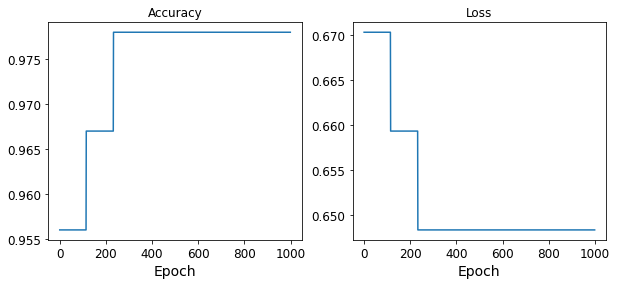

[0.978021978021978, 0.6483516483516484]

In [ ]:
ntrain = X_train.shape[0]
sgdfn(ntrain,1e-5)

## Part 2: Exploring different learning rates

Learning rate = 1e-08


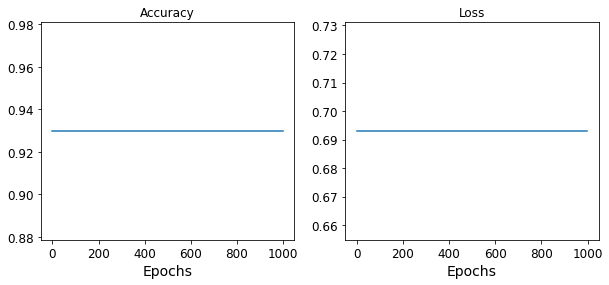

Learning rate = 1e-07


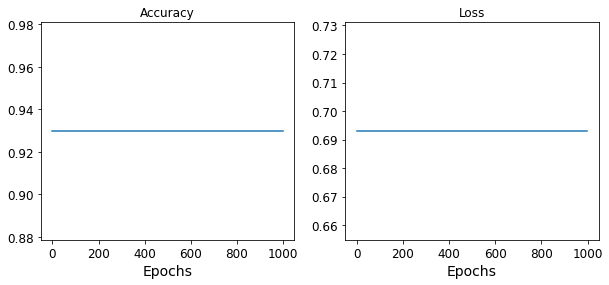

Learning rate = 1e-06


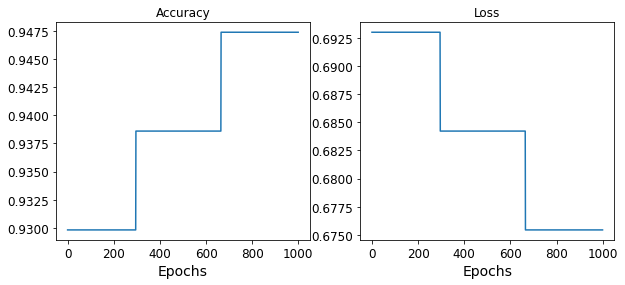

Learning rate = 1e-05


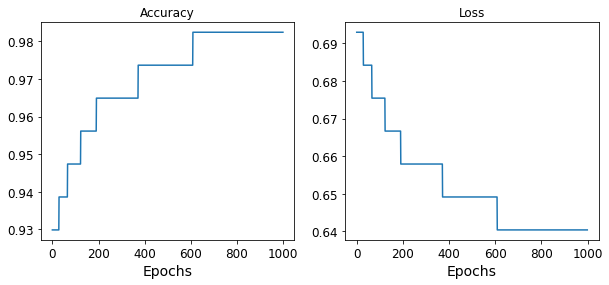

Learning rate = 0.0001


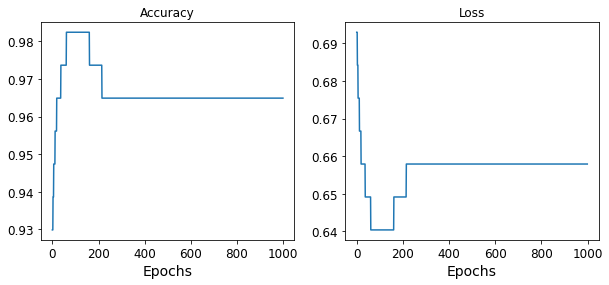

Learning rate = 0.001


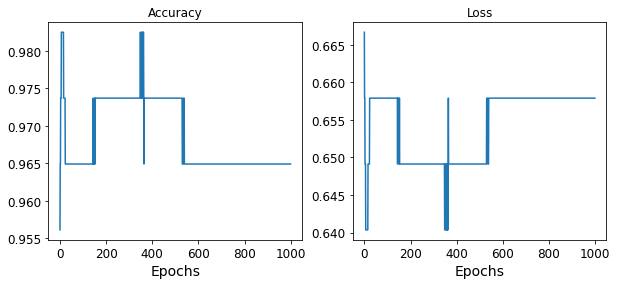

Learning rate = 0.01


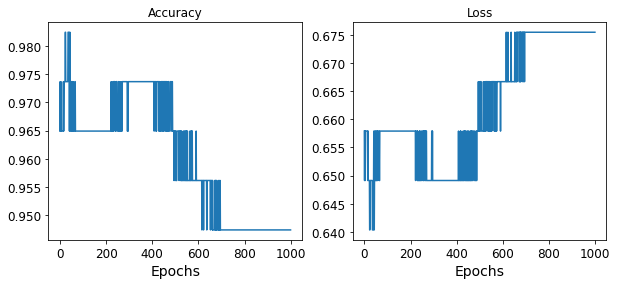

Learning rate = 0.1


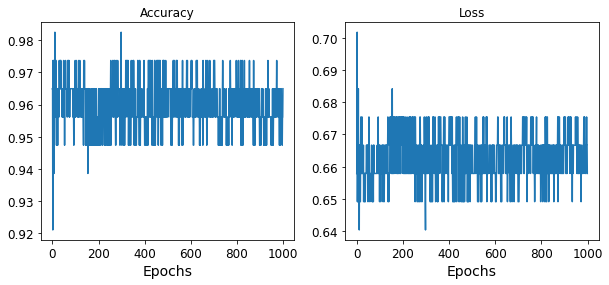

Learning rate = 1.0


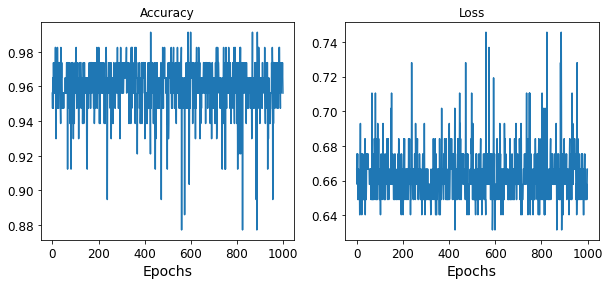

Learning rate = 10.0


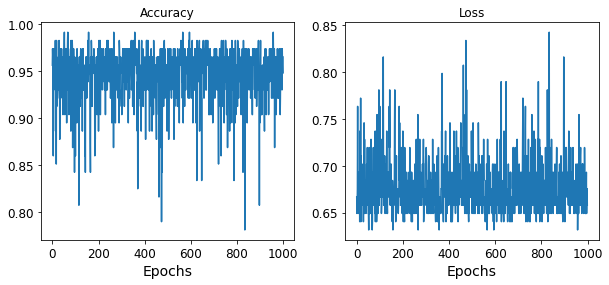

Learning rate = 100.0


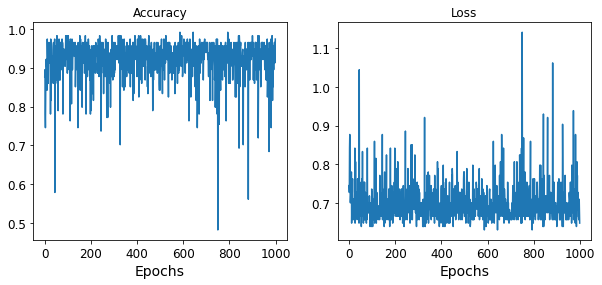

[0.9298245614035088, 0.6929824561403509, 0.9298245614035088, 0.6929824561403509, 0.9473684210526315, 0.6754385964912281, 0.9824561403508771, 0.6403508771929824, 0.9649122807017544, 0.6578947368421053, 0.9649122807017544, 0.6578947368421053, 0.9473684210526315, 0.6754385964912281, 0.9649122807017544, 0.6578947368421053, 0.956140350877193, 0.6666666666666666, 0.9649122807017544, 0.6578947368421053, 0.9736842105263158, 0.6491228070175439]


In [ ]:
res=[]
for lr_exp in range(-8,+3):
    lr = 10.0**lr_exp
    print(f'Learning rate = {lr}')
    res += sgdfn(ntrain,lr)
print(res)

### **Take home message:** get used to seeing what things look like when the learning rate is too small or too large. Unstable results like the ones at the end sometimes produce models that are OK, but almost always the models could be better if the learning rate was better suited to them.

## Part 3: Effect of number of samples on learning rate

Number of samples = 50


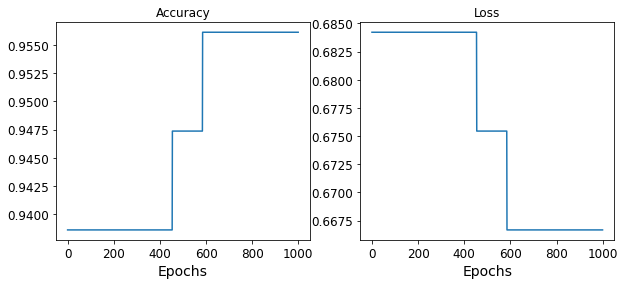

Number of samples = 100


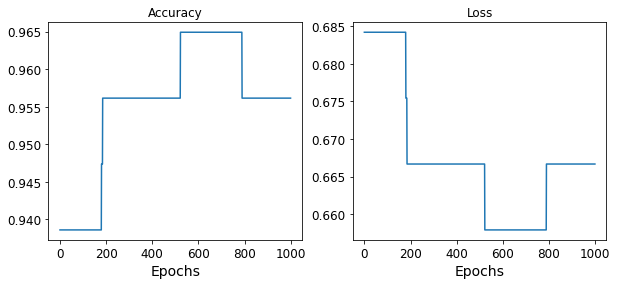

Number of samples = 150


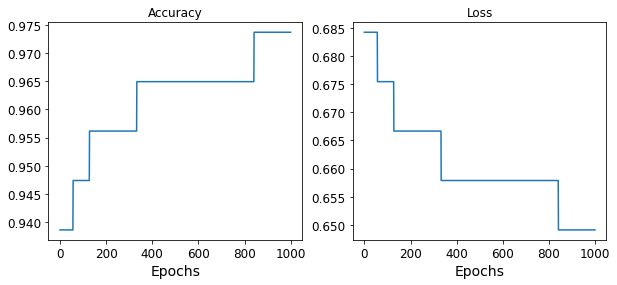

Number of samples = 200


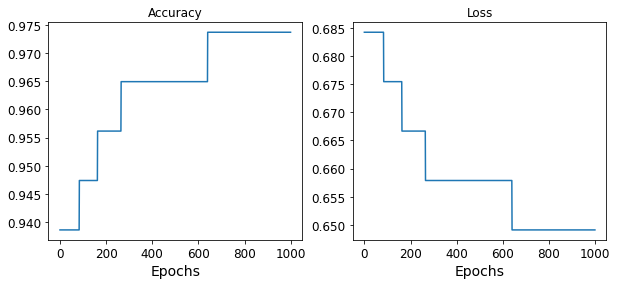

Number of samples = 250


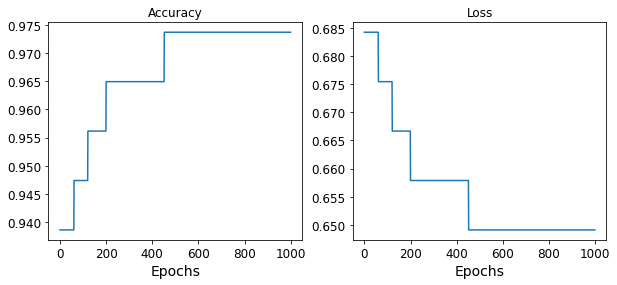

Number of samples = 300


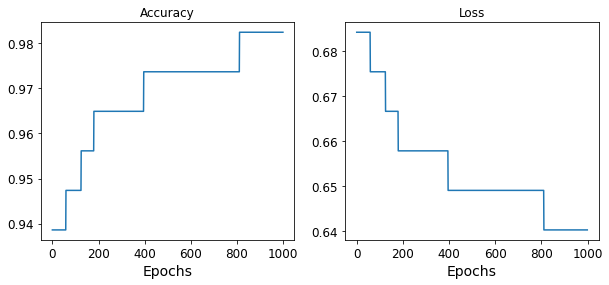

In [ ]:
res=[]
for nsamp in range(50,ntrain,50):
    print(f'Number of samples = {nsamp}')
    res += sgdfn(nsamp,1e-5)

Learning rate = 1e-06, n=100


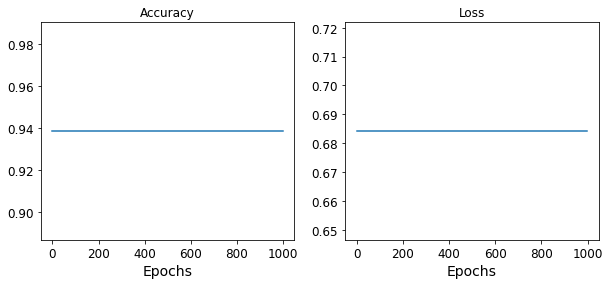

Learning rate = 1e-06, n=341


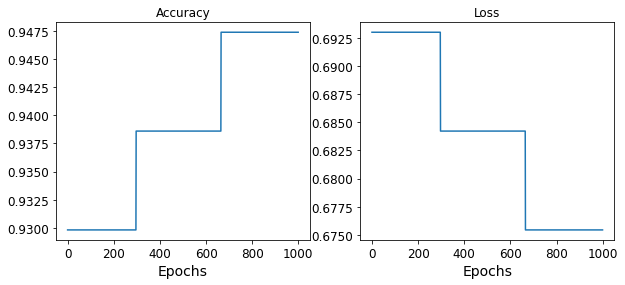

Learning rate = 3.162277660168379e-06, n=100


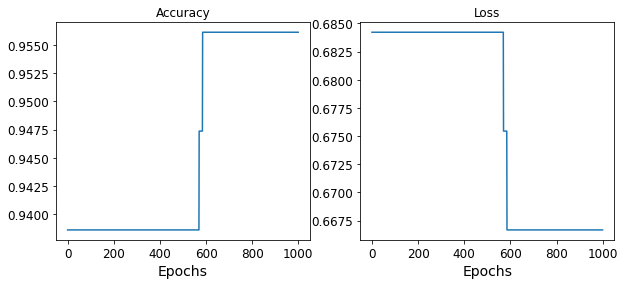

Learning rate = 3.162277660168379e-06, n=341


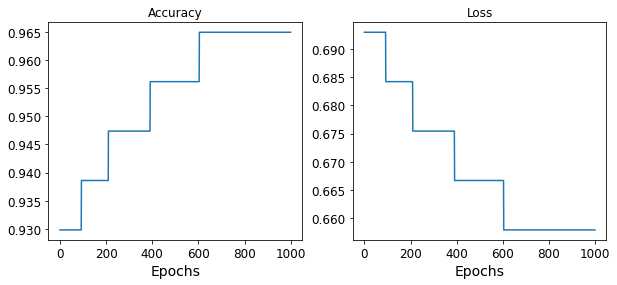

Learning rate = 1e-05, n=100


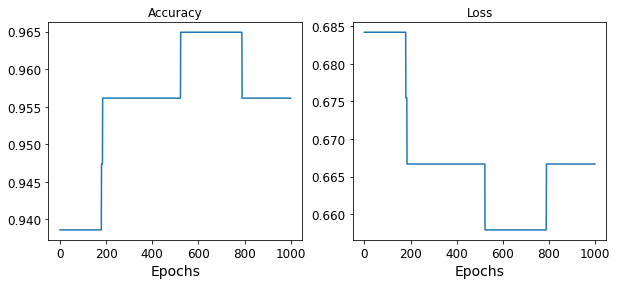

Learning rate = 1e-05, n=341


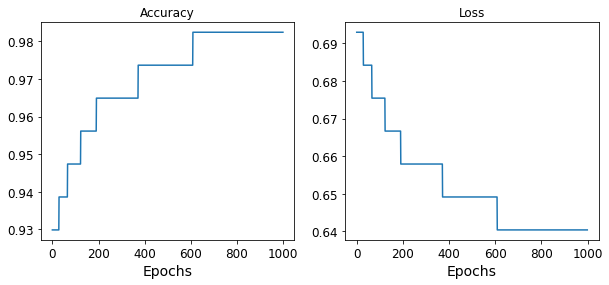

Learning rate = 3.1622776601683795e-05, n=100


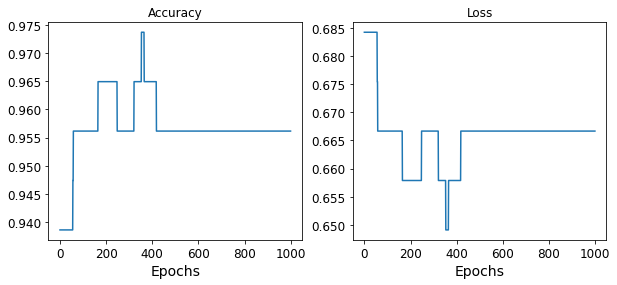

Learning rate = 3.1622776601683795e-05, n=341


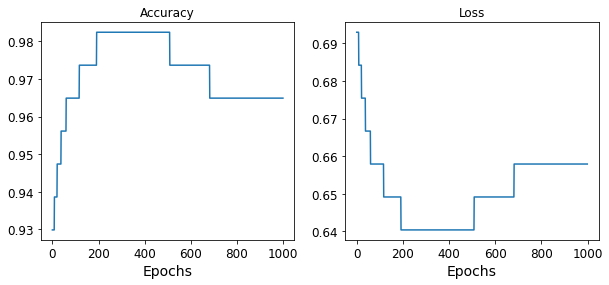

Learning rate = 0.0001, n=100


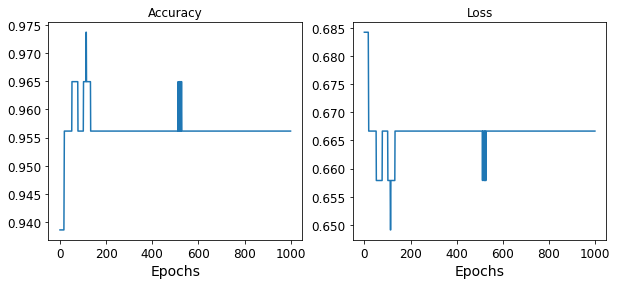

Learning rate = 0.0001, n=341


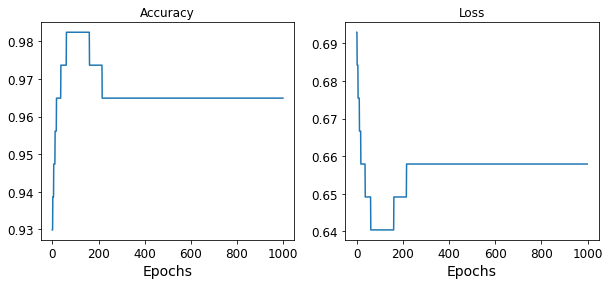

Learning rate = 0.00031622776601683794, n=100


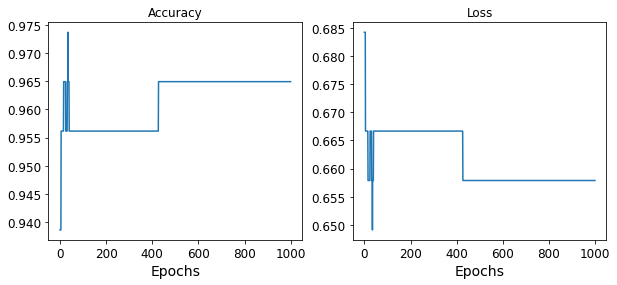

Learning rate = 0.00031622776601683794, n=341


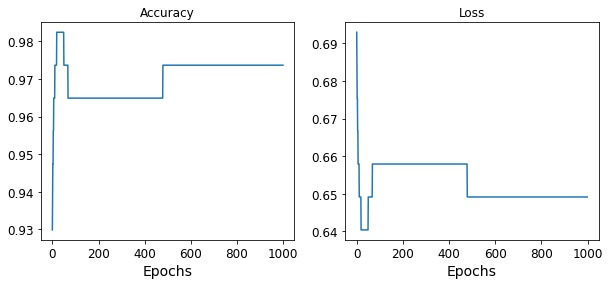

In [ ]:
for lr_exp in np.arange(-6,-3,0.5):
    lr = 10.0**lr_exp
    print(f'Learning rate = {lr}, n=100')
    sgdfn(100,lr)
    print(f'Learning rate = {lr}, n={ntrain}')
    sgdfn(ntrain,lr)

### **Take home message:** there is a relatively narrow zone sometimes of learning rates between too slow and too unstable. This also depends on the data (and the task) so learning rates need to be appropriately tuned for each problem.

## Part 4: Learning rate options

In [ ]:
sgdfn(ntrain,1e-5,loop=False)

Number of epochs/iterations performed was 1000


/opt/miniconda3/envs/umlt/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[0.9824561403508771, 0.6403508771929824]

In [ ]:
sgdfn(ntrain,1e-5,learntype='optimal',loop=False)

Number of epochs/iterations performed was 16


[0.9649122807017544, 0.6578947368421053]

In [ ]:
sgdfn(ntrain,1e-6,learntype='optimal',loop=False)

Number of epochs/iterations performed was 26


[0.956140350877193, 0.6666666666666666]

In [ ]:
sgdfn(ntrain, 1e-5, learntype='constant', loop=False, early_stopping=True, verbose=0, tol=1e-3, n_iter_no_change=5)

Number of epochs/iterations performed was 6


[0.9298245614035088, 0.6929824561403509]

### **Take home message:** the 'optimal' methods may or may not do better than simpler ones. Don't assume that the latest method or the method with the most impressive name/maths will do the best. Try a range of different things whenever possible. And remember that many of these things are stochastic, so if you ran it again, you'll get a different result (a lot of the time). However, also consider how much time or computational resources you have, as the later versions need far fewer epochs/iterations (in this case it is pretty trivial, but for very big datasets and very big models, such as in deep learning, the computational time can be a big issue to consider).

## Part 5: Regularisation (plus the early stopping extension)

Alpha = 1e-08
Number of epochs/iterations performed was 6
Alpha = 1e-07
Number of epochs/iterations performed was 6
Alpha = 1e-06
Number of epochs/iterations performed was 6
Alpha = 1e-05
Number of epochs/iterations performed was 6
Alpha = 0.0001
Number of epochs/iterations performed was 6
Alpha = 0.001
Number of epochs/iterations performed was 6
Alpha = 0.01
Number of epochs/iterations performed was 6
Alpha = 0.1
Number of epochs/iterations performed was 6
Alpha = 1.0
Number of epochs/iterations performed was 6
Alpha = 10.0
Number of epochs/iterations performed was 6
Alpha = 100.0
Number of epochs/iterations performed was 6
Alpha = 1000.0
Number of epochs/iterations performed was 6
Alpha = 10000.0
Number of epochs/iterations performed was 6
Alpha = 100000.0
Number of epochs/iterations performed was 6
Alpha = 1000000.0
Number of epochs/iterations performed was 6
Alpha = 10000000.0
Number of epochs/iterations performed was 6
Alpha = 1e-08
Number of epochs/iterations performed was 6
Alph

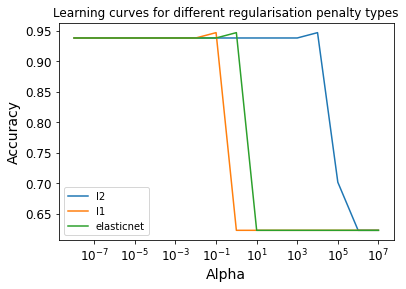

In [ ]:
for pen in ['l2','l1','elasticnet']:
    res = []
    alphxvals = np.arange(-8,+8)
    for alphx in alphxvals:
        print(f'Alpha = {10.0**alphx}')
        res += [ sgdfn(100, 1e-6, learntype='constant', loop=False, early_stopping=False, 
                       verbose=0, tol=1e-3, n_iter_no_change=5, alpha=10.0**alphx, penalty=pen) ]
    res=np.array(res)
    plt.semilogx(10.0**alphxvals,res[:,0])
plt.title(f'Learning curves for different regularisation penalty types')
plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.legend(['l2','l1','elasticnet'])
plt.show()

### **Take home message:** these are *many orders of magnitude* different from one another in terms of their effect on the same dataset. So whenever you are investigating parameters for this, or other things, remember that you should try a very wide range of values to make sure that you are seeing the full effect. In this case regularisation isn't really needed, but too much lowers the performance, which is typical.

## Part 6: Model comparison and test evaluation

In [ ]:
sgd = SGDClassifier(learning_rate='constant', eta0=1e-5, 
                        early_stopping=False, 
                        validation_fraction=0.1, penalty='l2')   
sgd_pipe = Pipeline([('preproc',preproc_pl),('sgd',sgd)])

sgd_pipe.fit(X_train,y_train)
y_val_pred = sgd_pipe.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

sgd_pipe.fit(np.concatenate((X_train,X_val),axis=0),np.concatenate((y_train,y_val),axis=0))
y_test_pred = sgd_pipe.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Validation and Test accuracies are: {val_acc} and {test_acc}')

Validation and Test accuracies are: 0.9473684210526315 and 0.956140350877193


### **Take home message:** although the validation accuracy is, on average, biased by the selection process the random element of sample selection often means that it is hard to know if the test accuracy will be more or less than the validation accuracy, but it should normally be similar. If it is very different then you either have a lot of random variation (often due to sample sizes being too small) or you have a bigger problem in the code or in the selection of the samples.